# Introduction

    * Importing Library
    * Preprocessing Steps
    * Data Analysis
    * Machine Learning Algorithms
    



## Importing Libraries

In [18]:
#!pip install kaggle

In [19]:
#from google.colab import files
#files.upload()  # Bu komut, kaggle.json dosyasını yüklemenizi sağlar.

In [20]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [21]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
creditcardfraud.zip: Skipping, found more recently modified local copy (use --force to force download)


In [22]:
!unzip creditcardfraud.zip

Archive:  creditcardfraud.zip
replace creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: no


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn import svm
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest,  RandomForestClassifier
from sklearn.linear_model import LogisticRegression , LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score, accuracy_score
from sklearn import datasets, svm, tree, linear_model, metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering



df = pd.read_csv('creditcard.csv')

In [24]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


##2. Preprocessing
### 2.1 Missing value treatment

Kayıp veri olmadığı aşağıda görülmektedir. Bu sebeple kayıp verileri doldurma işlemine gerek kalmamıştır.

In [25]:
df.isnull().any()

,0
Time,False
V1,False
V2,False
V3,False
V4,False
V5,False
V6,False
V7,False
V8,False
V9,False


### 2.2 Feature Scaling

In [26]:
# İlk birkaç satırı görelim
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

   Amount_Scaled
0       0.244964
1      -0.342475
2       1.160686
3       0.140534
4      -0.073403
   Amount
0  149.62
1    2.69
2  378.66
3  123.50
4   69.99


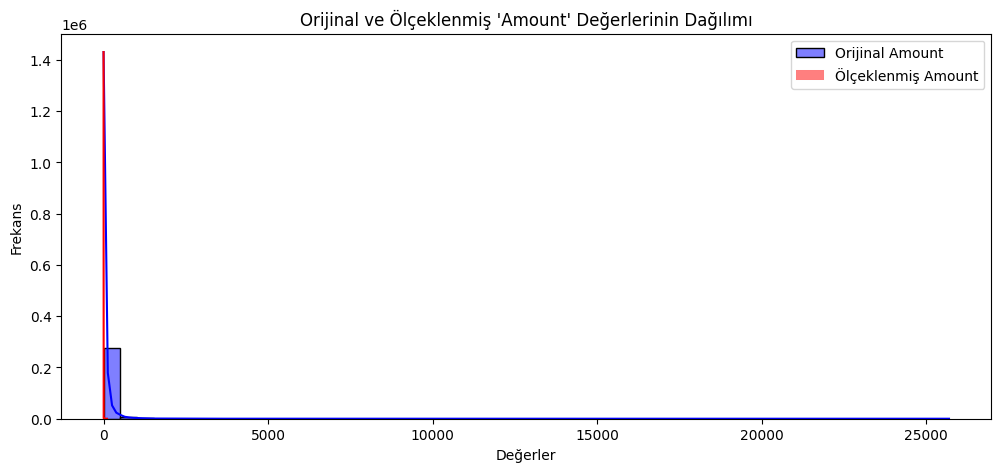

In [27]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


# Veri setini yükle
df = pd.read_csv("creditcard.csv")

# 'Amount' sütununu ayrı bir değişkene kaydet
amount_values = df[['Amount']].copy()  # DataFrame olarak kopyaladık

# Yeni bir DataFrame oluştur (Ölçeklendirme işlemi için)
df_scaled = df.copy()

# StandardScaler nesnesini oluştur
scaler = StandardScaler()

# 'Amount' sütununu ölçeklendir ve yeni sütun olarak ekle
df_scaled['Amount_Scaled'] = scaler.fit_transform(amount_values)
df['Scaled_Time'] = scaler.fit_transform(df[['Time']])

# Eğer 'Amount' sütunu df'den silinmişse, burada kullanabilirsin
print(df_scaled[['Amount_Scaled']].head())

# Eğer orijinal Amount sütunu lazımsa, amount_values değişkeninde hala duruyor!
print(amount_values.head())

# Histogram çizimi
plt.figure(figsize=(12, 5))
sns.histplot(df['Amount'], bins=50, kde=True, color="blue", label="Orijinal Amount")
sns.histplot(df_scaled['Amount_Scaled'], bins=50, kde=True, color="red", label="Ölçeklenmiş Amount")


plt.legend()
plt.xlabel("Değerler")
plt.ylabel("Frekans")
plt.title("Orijinal ve Ölçeklenmiş 'Amount' Değerlerinin Dağılımı")
plt.show()


Yukarıdaki kod hem Amount hem de Amount_Scaled değişkenlerinin histogramlarını karşılaştırmalı olarak çizerek scalingimizi doğru yaptığımızı göstermektedir.

In [28]:
print(df_scaled.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'Amount_Scaled'],
      dtype='object')


#### Aşağıda min-max yöntemi ile feature scaling aralığı 0-1 olarak belirlenmiştir.

In [29]:

'''
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler nesnesini oluştur
scaler = MinMaxScaler()

# 'Time' hariç tüm numerik sütunları seç
columns_to_scale = df.columns.difference(['Class'])  # 'Class' (etiket) hariç tüm özellikler

# Seçili sütunlara MinMaxScaling uygula
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Güncellenmiş veri setini göster
print(df.head())
'''



"\nfrom sklearn.preprocessing import MinMaxScaler\n\n# MinMaxScaler nesnesini oluştur\nscaler = MinMaxScaler()\n\n# 'Time' hariç tüm numerik sütunları seç\ncolumns_to_scale = df.columns.difference(['Class'])  # 'Class' (etiket) hariç tüm özellikler\n\n# Seçili sütunlara MinMaxScaling uygula\ndf[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])\n\n# Güncellenmiş veri setini göster\nprint(df.head())\n"

### 2.3.a) IQR Yöntemi ile Aykırı Değerleri Bulma

In [30]:
Q1 = df['Amount'].quantile(0.25)  # 1. çeyrek
Q3 = df['Amount'].quantile(0.75)  # 3. çeyrek
IQR = Q3 - Q1  # IQR hesapla

# Aykırı değerleri belirleme kriteri
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Aykırı değerleri filtreleyelim
outliers = df[(df['Amount'] < lower_bound) | (df['Amount'] > upper_bound)]

print(f"Aykırı değer sayısı: {len(outliers)}")
print(outliers.head())  # İlk birkaç aykırı değeri göster

Aykırı değer sayısı: 31904
    Time        V1        V2        V3        V4        V5        V6  \
2    1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
20  16.0  0.694885 -1.361819  1.029221  0.834159 -1.191209  1.309109   
51  36.0 -1.004929 -0.985978 -0.038039  3.710061 -6.631951  5.122103   
64  42.0 -0.522666  1.009923  0.276470  1.475289 -0.707013  0.355243   
85  55.0 -4.575093 -4.429184  3.402585  0.903915  3.002224 -0.491078   

          V7        V8        V9  ...       V22       V23       V24       V25  \
2   0.791461  0.247676 -1.514654  ...  0.771679  0.909412 -0.689281 -0.327642   
20 -0.878586  0.445290 -0.446196  ... -0.571955 -0.050881 -0.304215  0.072001   
51  4.371691 -2.006868 -0.278736  ... -0.381671  0.969719  0.019445  0.570923   
64  1.559849 -0.399579 -0.479813  ...  1.011543  0.069666  0.157820 -1.109224   
85 -2.705393  0.666451  1.922216  ...  0.853360 -0.971600 -0.114862  0.408300   

         V26       V27       V28   Amount  Class  Sca

In [31]:
from scipy import stats

# 'Amount' sütunu için Z-Score hesapla
df['Z_Score'] = np.abs(stats.zscore(df['Amount']))

# Z-Skoru 3'ten büyük olanları aykırı kabul et
outliers_z = df[df['Z_Score'] > 3]

print(f"Amount sütununda {len(outliers_z)} adet aykırı değer var (Z-Score yöntemiyle).")
print(outliers_z.head())

# Z_Score sütununu temizleyelim (sadece analiz için eklemiştik)
df.drop(columns=['Z_Score'], inplace=True)


Amount sütununda 4076 adet aykırı değer var (Z-Score yöntemiyle).
      Time        V1         V2        V3        V4        V5        V6  \
51    36.0 -1.004929  -0.985978 -0.038039  3.710061 -6.631951  5.122103   
89    59.0 -0.773293  -4.146007 -0.932038  0.027094 -1.698307  0.460188   
140   87.0 -5.101877   1.897022 -3.458034 -1.277543 -5.517758  2.098366   
150   93.0 -1.640014  -0.479831  1.613630  2.997979 -3.803788  5.051812   
164  103.0 -6.093248 -12.114213 -5.694973  3.294389 -1.413792  4.776000   

           V7        V8        V9  ...       V23       V24       V25  \
51   4.371691 -2.006868 -0.278736  ...  0.969719  0.019445  0.570923   
89   0.737344 -0.314216 -0.842673  ... -1.134769 -0.654958  0.098386   
140  3.329603  1.250966  0.271501  ... -0.555900 -0.761660  0.066611   
150  3.315254 -0.303785  0.671395  ... -0.405779 -1.268700  0.494090   
164  4.808426 -0.228197 -0.525896  ... -3.553381  1.215279 -0.406073   

          V26       V27       V28   Amount  Class 

### 2.4 Train Test Splitting

In [32]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'Scaled_Time'],
      dtype='object')

In [33]:
features = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class']
X = df.loc[:, features]
y = df.loc[:,['Class']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train = {X_train.shape}")
print(f"y_train = {y_train.shape}")
print(f"X_test = {X_test.shape}")
print(f"y_test = {y_test.shape}")

X_train = (227845, 31)
y_train = (227845, 1)
X_test = (56962, 31)
y_test = (56962, 1)


Yukarıdaki kodda sırasıyla özellikleri (X) ve hedef değişkeni (y) ayırdık.
Veriyi %80 eğitim - %20 test olarak böldük.
Eğitim ve test setlerinin boyutlarını yazdırdık.

### 2.5 K-fold ile Cross Validation

In [34]:
from sklearn.model_selection import KFold

# KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42) # 5-fold cross-validation

# Perform K-Fold cross-validation (no classifier)
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # You can print or analyze the train and validation folds if needed
    print("Train fold:", train_index)
    print("Validation fold:", val_index)

Train fold: [     0      1      2 ... 227842 227843 227844]
Validation fold: [     4      6     11 ... 227829 227835 227836]
Train fold: [     1      2      3 ... 227840 227841 227842]
Validation fold: [     0     20     30 ... 227828 227843 227844]
Train fold: [     0      2      4 ... 227840 227843 227844]
Validation fold: [     1      3     21 ... 227839 227841 227842]
Train fold: [     0      1      3 ... 227842 227843 227844]
Validation fold: [     2      7      8 ... 227825 227830 227834]
Train fold: [     0      1      2 ... 227842 227843 227844]
Validation fold: [     5     10     15 ... 227833 227838 227840]


Yukarıda KFold nesnesini oluşturduk (n_splits=5, shuffle=True ile verileri karıştırdık).
Veriyi 5 parçaya böldük ve her iterasyonda farklı bir parçayı doğrulama seti olarak seçtik.
Her iterasyonda eğitim ve doğrulama setlerini belirledik.
Hangi satırların eğitim/doğrulama için seçildiğini yazdırdık.

# 3. Data Analysis

    Describing the Data
    Correlation analysis
    Distribution analysis
    Time-based patterns
    Amount-based patterns
    Feature importance analysis


### 3.1 Describing the Data

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 32 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Time         284807 non-null  float64
 1   V1           284807 non-null  float64
 2   V2           284807 non-null  float64
 3   V3           284807 non-null  float64
 4   V4           284807 non-null  float64
 5   V5           284807 non-null  float64
 6   V6           284807 non-null  float64
 7   V7           284807 non-null  float64
 8   V8           284807 non-null  float64
 9   V9           284807 non-null  float64
 10  V10          284807 non-null  float64
 11  V11          284807 non-null  float64
 12  V12          284807 non-null  float64
 13  V13          284807 non-null  float64
 14  V14          284807 non-null  float64
 15  V15          284807 non-null  float64
 16  V16          284807 non-null  float64
 17  V17          284807 non-null  float64
 18  V18          284807 non-

In [36]:
df.describe() # Sayısal sütunlar

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Scaled_Time
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000,2.848070e+05
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727,-3.065637e-16
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527,1.000002e+00
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000,-1.996583e+00
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000,-8.552120e-01
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000,-2.131453e-01
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000,9.372174e-01
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000,1.642058e+00


In [37]:
df.head() # İlk 5 satır

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Scaled_Time
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,-1.996583
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-1.996583
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,-1.996562
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,-1.996562
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-1.996541


### 3.2 Correlation Analysis

Korelasyon analizi, iki değişken arasındaki doğrusal ilişkiyi ölçer ve -1 ile 1 arasında bir değer alır. Eğer korelasyon 1'e yakınsa, değişkenler arasında güçlü bir pozitif ilişki vardır; yani biri arttığında diğeri de artar. -1'e yakın bir değer, değişkenler arasında güçlü bir negatif ilişki olduğunu gösterir; biri artarken diğeri azalır. Korelasyon değeri 0'a yaklaştıkça, değişkenler arasında anlamlı bir doğrusal ilişki olmadığı anlaşılır.

In [38]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Scaled_Time
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323,1.000000
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347,0.117396
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289,-0.010593
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961,-0.419618
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447,-0.105260
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974,0.173072
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643,-0.063016
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257,0.084714
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875,-0.036949
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733,-0.008660


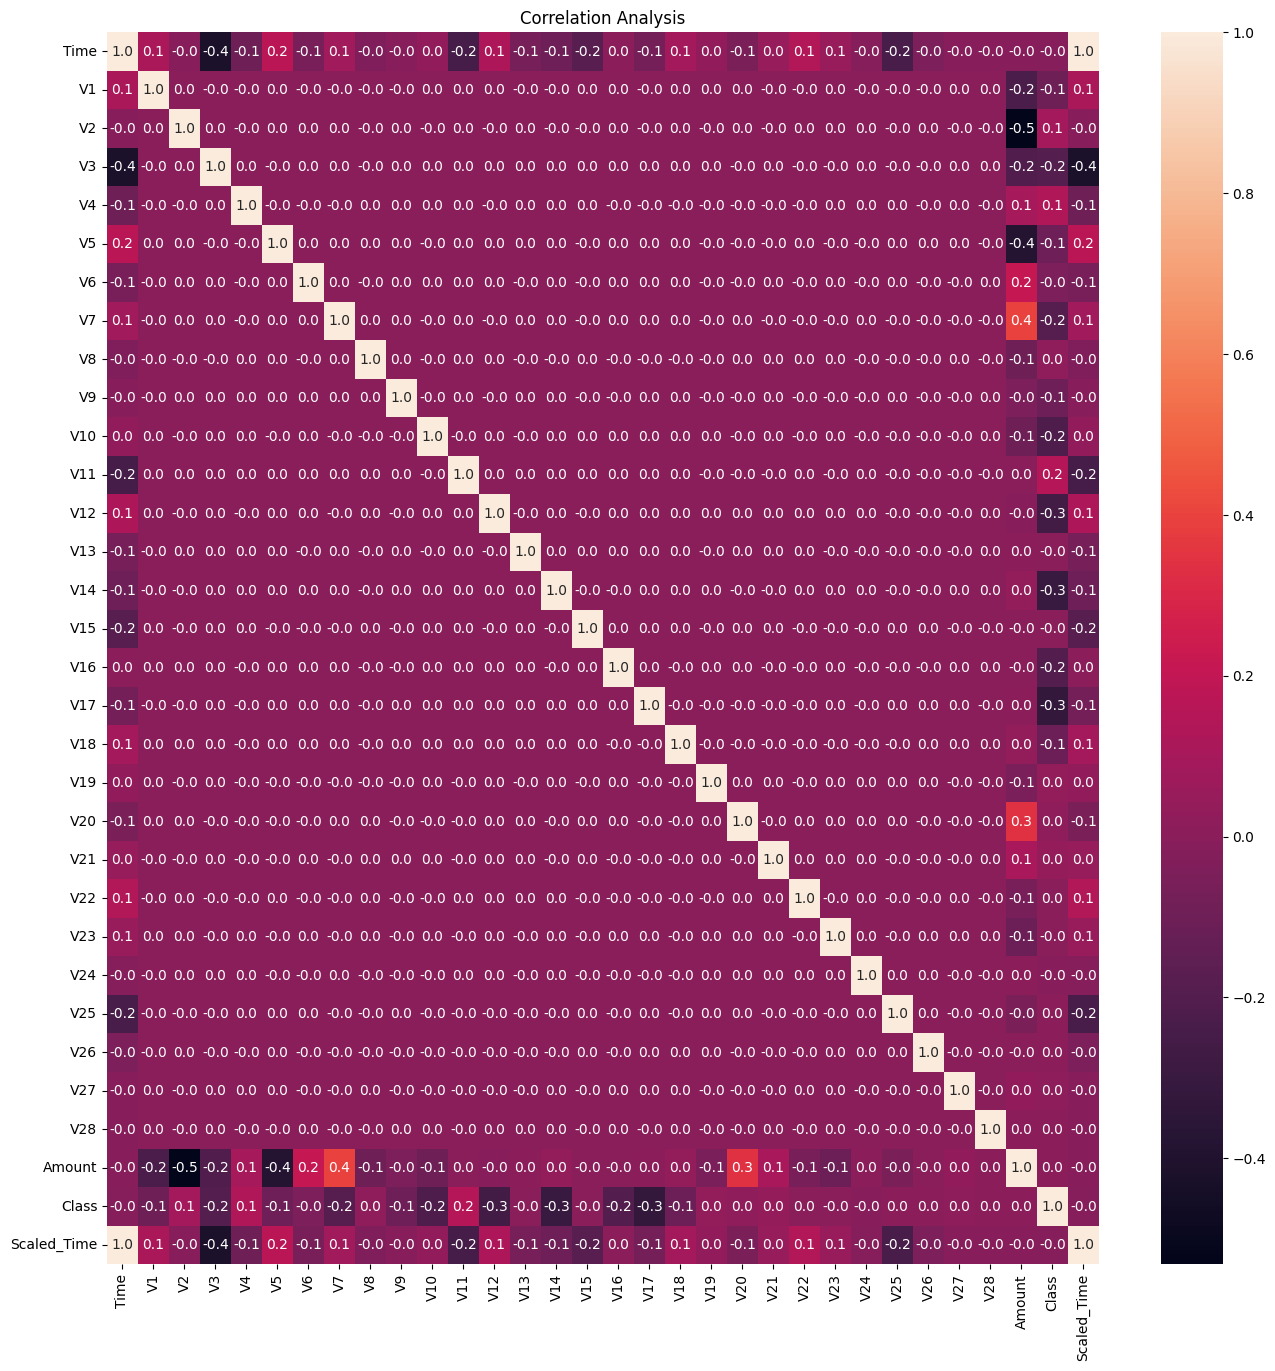

In [39]:
plt.figure(figsize=(16, 16))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.1f')
plt.title('Correlation Analysis')
plt.show()

### 3.3 Distribution Analysis
Dağılım analizi, bir veri kümesindeki değerlerin nasıl dağıldığını anlamak için kullanılan bir yöntemdir. Verilerin merkezi eğilimlerini, yayılımını ve şeklini inceleyerek veri hakkında daha fazla bilgi edinmemizi sağlar.


In [40]:
df['Class'].value_counts()   # Classi gösterdik, dolandırıcılıklar 0 ve 1 olarak gösterildi. (0 dolandırıcılık olmayan durum)

,count
Class,
0,284315
1,492


<ipython-input-41-2a4bf56788de>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Class"], palette=['blue', 'red'])


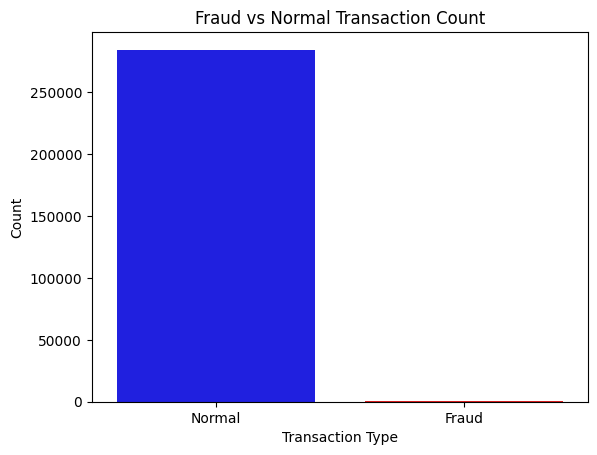

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x=df["Class"], palette=['blue', 'red'])
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.xticks([0,1], ['Normal', 'Fraud'])
plt.title("Fraud vs Normal Transaction Count")
plt.show()


In [42]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Scaled_Time
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,-1.996583
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-1.996583
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,-1.996562
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,-1.996562
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-1.996541


In [43]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Scaled_Time
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,-1.996583
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-1.996583
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,-1.996562
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,-1.996562
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-1.996541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,1.641931
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,1.641952
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,1.641974
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,1.641974


Normal işlemler (Class = 0) ve dolandırıcılık işlemlerinin (Class = 1) sayısını gösteren bir çubuk grafik oluşturduk.
Veri çok dengesiz olduğundan (dolandırıcılık işlemi az), grafikte büyük bir fark gözlemlenmiştir.

### 3.4 Time-Based Patterns


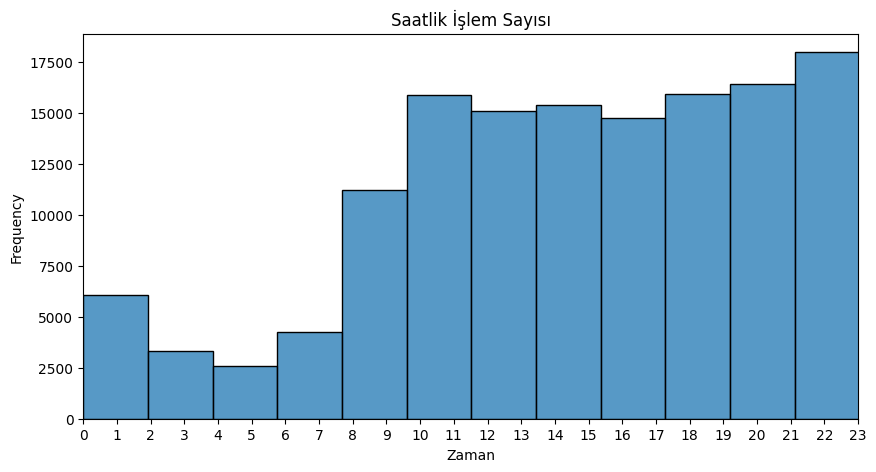

In [44]:
plt.figure(figsize=(10, 5))
df['Time']=df['Time']/3600  # saniye saate çevrildi.
sns.histplot(df['Time'],bins=25, kde=False)
plt.xticks(np.arange(0, 25, 1))
plt.xlim(0,23)
plt.title('Saatlik İşlem Sayısı')
plt.xlabel('Zaman')
plt.ylabel('Frequency')
plt.show()

Yukarıdaki kod, 'Time' sütunundaki saniye verilerini saate çevirip, saatlik işlem sayısını 24 dilimde bir histogram olarak görselleştirir. X ekseni 0-23 saat arası, Y ekseni ise işlem sıklığını gösterir.

### 3.5 Feature Importance Analysis


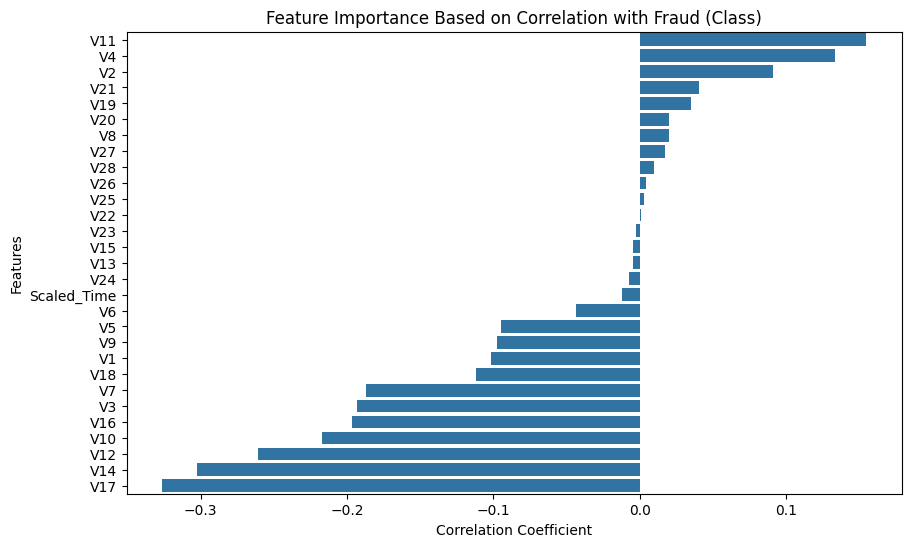

In [45]:
corr_data= df.drop(columns=['Time', 'Amount'])
correlation_matrix = corr_data.corr()
feature_importance = correlation_matrix["Class"].sort_values(ascending=False)
top_features = feature_importance.index[1:]
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance[top_features].values, y=top_features)
plt.title("Feature Importance Based on Correlation with Fraud (Class)")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.show()

Yukarıdaki kod, 'Time' ve 'Amount' sütunlarını çıkararak, geri kalan özellikler arasındaki korelasyon matrisini hesaplar. 'Class' ile en yüksek korelasyona sahip özellikleri sıralar ve bu özelliklerin önemini bar grafiğiyle görselleştirir.


### 3.6 Amount-Based Patterns

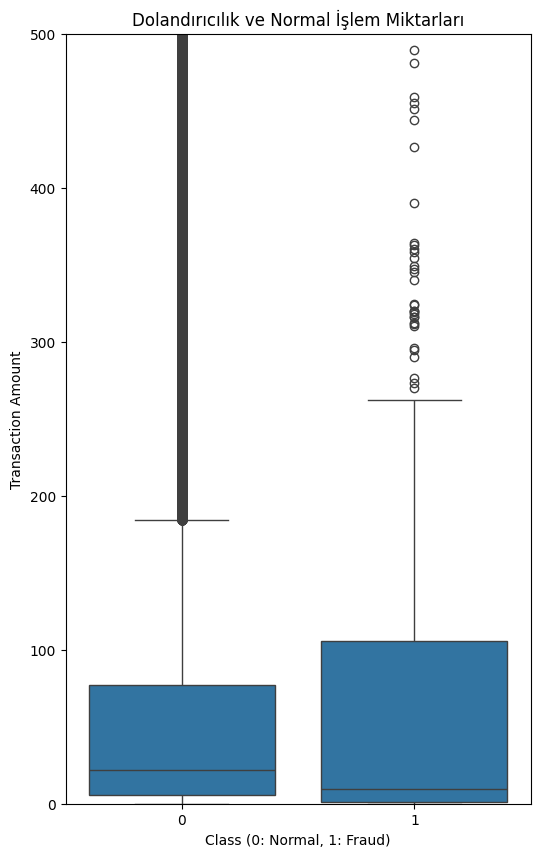

In [46]:
# Boxplot - İşlem miktarlarını karşılaştır
plt.figure(figsize=(6, 10))
sns.boxplot(x=df['Class'], y=df['Amount'])
plt.ylim(0, 500)  # Görselliği iyileştirmek için üst sınır koy
plt.title("Dolandırıcılık ve Normal İşlem Miktarları")
plt.xlabel("Class (0: Normal, 1: Fraud)")
plt.ylabel("Transaction Amount")
plt.show()

Kodumuz, 'Class' ile işlem miktarlarını karşılaştıran bir boxplot oluşturur, böylece dolandırıcılık ve normal işlemler arasındaki işlem miktarı farkını gösterir.

### 3.7 Pie Chart Method


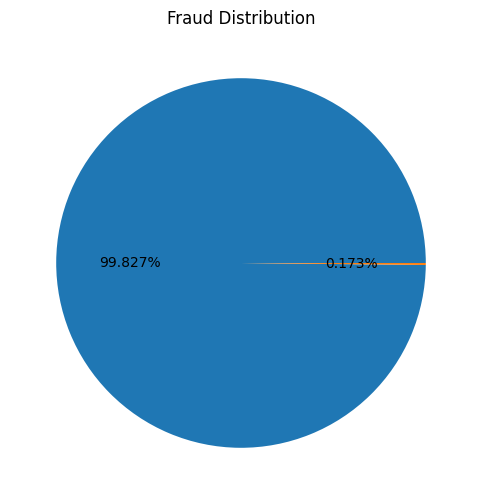

In [47]:
datanew = df['Class'].value_counts()
labels = ['Normal', 'Fraud']
plt.figure(figsize=(6, 6))
plt.pie(datanew, autopct='%1.3f%%')
plt.title("Fraud Distribution")
plt.show()

### 3.8 Violin Plot Method


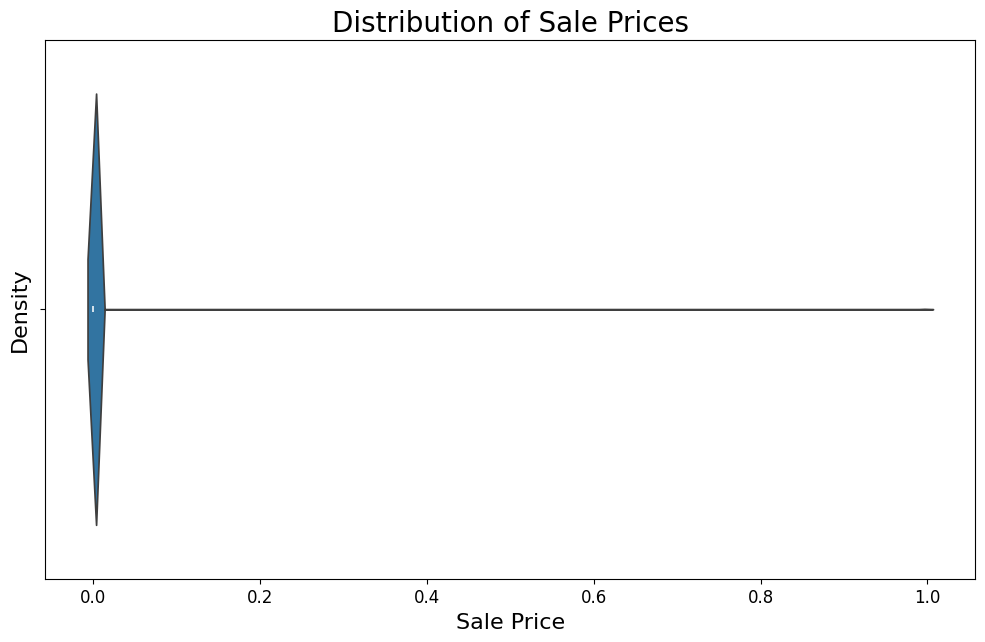

In [48]:
plt.figure(figsize=(12, 7))
ax = sns.violinplot(x='Class', data=df)
ax.set_title('Distribution of Sale Prices', fontsize=20)
ax.set_xlabel('Sale Price', fontsize=16)
ax.set_ylabel('Density', fontsize=16)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

plt.show()


Yukarıdaki kod, violin plot kullanarak, df veri çerçevesindeki Class sütununun dağılımını görselleştirir

# 4.0 Machine Learning Algorithms

### 4.1 Linear Regression

Mean Squared Error (MSE): 0.0008301184002984185
R^2 Score: 0.5166663660896537


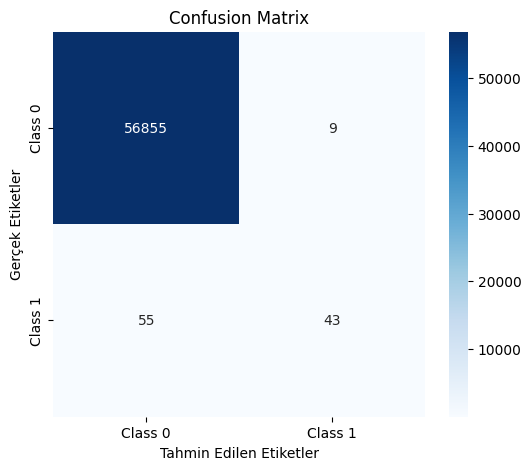

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Veriyi hazırlama (MinMaxScaler ile feature scaling)
scaler = MinMaxScaler()

# 'Class' hariç tüm numerik sütunları seç
columns_to_scale = df.columns.difference(['Class'])

# Seçili sütunlara MinMaxScaling uygula
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# X (özellikler) ve y (etiket) ayırma
X = df.drop('Class', axis=1)  # 'Class' sütununu özelliklerden çıkarıyoruz
y = df['Class']  # 'Class' sütunu etiket olarak kullanıyoruz

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lineer Regresyon modelini oluşturma
model = LinearRegression()

# Modeli eğitim seti ile eğitme
model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = model.predict(X_test)

# Tahmin edilen sürekli değerleri sınıflara dönüştürme (örneğin, 0.5 eşiği ile)
y_pred_class = (y_pred >= 0.5).astype(int)

# Modelin performansını değerlendirme
mse = mean_squared_error(y_test, y_pred)  # Ortalama kare hata (MSE)
r2 = r2_score(y_test, y_pred)  # R^2 skoru

# Sonuçları yazdırma
print(f'Mean Squared Error (MSE): {mse}')
print(f'R^2 Score: {r2}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_class)

# Confusion Matrix'i görselleştirme
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Tahmin Edilen Etiketler')
plt.ylabel('Gerçek Etiketler')
plt.show()


İlk olarak, sayısal veriler MinMaxScaler ile ölçeklendirilmiş ve ardından veriler eğitim ve test setlerine ayrılmıştır. Model eğitim verisiyle eğitilip, test verisi üzerinde tahminler yapılmış ve modelin başarısı ortalama kare hata (MSE) ve R² skoru ile değerlendirilmiştir.

Feature scaling ile 0-1 arasında katsayı verdiğimiz modelimizi lineer regresyonla eğittikten sonra yeterince başarılı olmadığını gördük.  

### 4.2 Logistic Regression

Accuracy: 0.9989291106351603
Precision: 0.8363636363636363
Recall: 0.46938775510204084
F1 Score: 0.6013071895424836


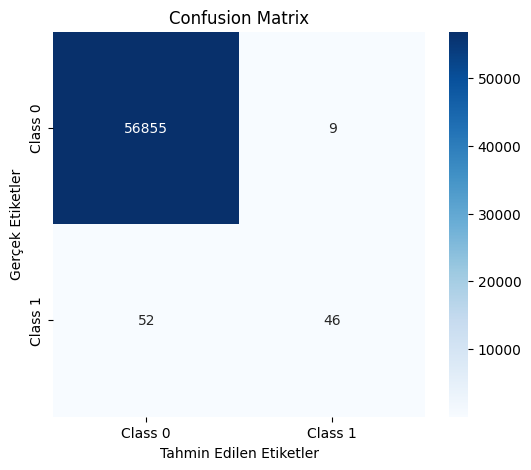

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Veriyi hazırlama (MinMaxScaler ile feature scaling)
scaler = MinMaxScaler()

# 'Class' hariç tüm numerik sütunları seç
columns_to_scale = df.columns.difference(['Class'])

# Seçili sütunlara MinMaxScaling uygula
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# X (özellikler) ve y (etiket) ayırma
X = df.drop('Class', axis=1)  # 'Class' sütununu özelliklerden çıkarıyoruz
y = df['Class']  # 'Class' sütunu etiket olarak kullanıyoruz

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistik Regresyon modelini oluşturma
model = LogisticRegression()

# Modeli eğitim seti ile eğitme
model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = model.predict(X_test)

# Modelin performansını değerlendirme
accuracy = accuracy_score(y_test, y_pred)  # Doğruluk
precision = precision_score(y_test, y_pred)  # Precision
recall = recall_score(y_test, y_pred)  # Recall
f1 = f1_score(y_test, y_pred)  # F1 skoru

# Sonuçları yazdırma
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Confusion Matrix'i görselleştirme
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Tahmin Edilen Etiketler')
plt.ylabel('Gerçek Etiketler')
plt.show()


Yukarıdaki kod, Lojistik Regresyon kullanarak ikili sınıflandırma yapar. Öncelikle, MinMaxScaler ile özellikler ölçeklendirilir ve bağımsız değişkenler (X) ile hedef değişken (y) ayrılır. Veri, %80 eğitim ve %20 test olacak şekilde bölünür. Lojistik regresyon modeli eğitim verileriyle eğitildikten sonra test verileri üzerinde tahmin yapılır. Modelin performansı, accuracy (doğruluk), precision, recall ve F1 skoru gibi metriklerle değerlendirilir. Son olarak, confusion matrix oluşturularak Seaborn ile görselleştirilir ve modelin yanlış ve doğru sınıflandırmaları analiz edilir.

### 4.3 Decision Tree

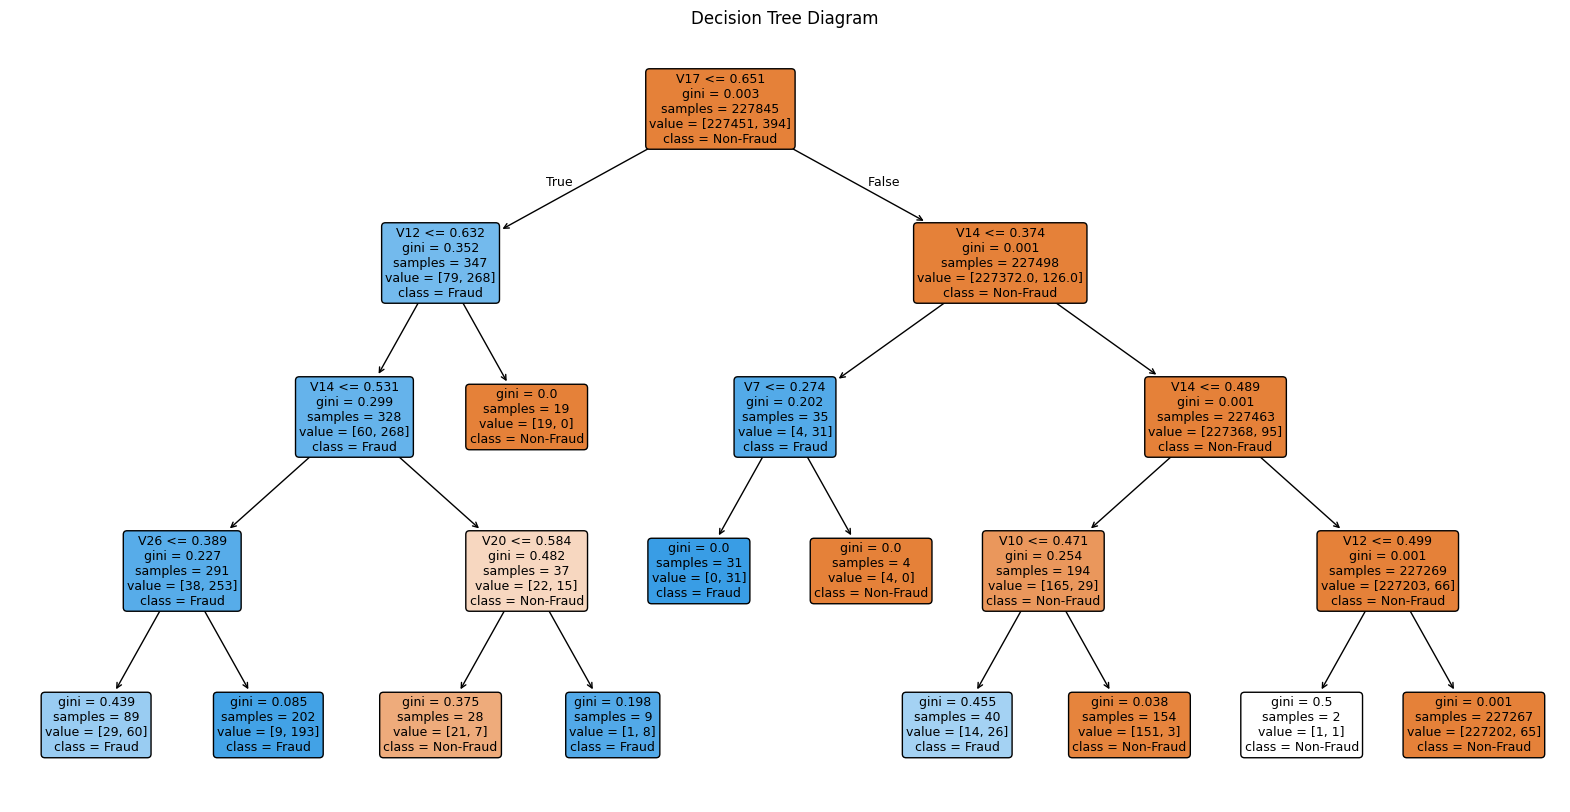

In [51]:
dt_model = DecisionTreeClassifier(random_state=0, max_depth=4)
dt_model.fit(X_train, y_train)

plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X_train.columns, class_names=["Non-Fraud", "Fraud"], filled=True, rounded=True)
plt.title("Decision Tree Diagram")
plt.show()
#gini: düğümdeki veri karışıklığını ifade eder.

Yukarıdaki kod, karar ağacı kullanarak dolandırıcılık tespiti için bir sınıflandırma modeli oluşturur. DecisionTreeClassifier ile maksimum 4 derinliğe sahip bir model eğitilir ve ardından plot_tree fonksiyonu ile görselleştirilir. Ağaç yapısı, veri kümesindeki belirli özelliklere (V17, V12, V14 vb.) göre dallanarak "Fraud" ve "Non-Fraud" sınıflarına ayrım yapar. Düğümlerde Gini katsayısı, veri saflığını gösterir; düşük değerler daha kesin kararlar alındığını ifade eder. Grafikte turuncu düğümler "Non-Fraud", mavi düğümler "Fraud" sınıfına aittir, renk koyuluğu ise sınıf baskınlığını belirtir. Model, dolandırıcılık tespitinde hangi değişkenlerin önemli olduğunu anlamaya yardımcı olur.


### 4.4 Random Forest Algorithm

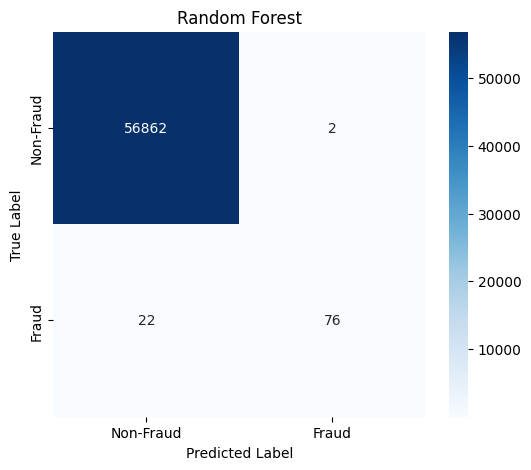

In [52]:
np.random.seed(42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train.values.ravel())

y_ran = rf.predict(X_test)

cm = confusion_matrix(y_test, y_ran)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Random Forest")
plt.show()

    RandomForestClassifier kullanarak 100 karar ağacı ile model oluşturuldu.
    MinMaxScaler ile özellikler ölçeklendirildi.
    train_test_split ile veri eğitim ve test setlerine ayrıldı.
    Model, eğitim seti ile eğitildi ve test verisi üzerinde tahmin yapıldı.
    Accuracy, Precision, Recall, F1-score gibi performans metrikleri hesaplandı.
    Confusion matrix ile sınıflandırma başarısı görselleştirildi.
  
Bu yöntem, Lojistik Regresyon'a kıyasla genellikle daha iyi doğruluk ve genelleme sundu, çünkü birden fazla karar ağacı kullanarak daha güçlü bir model oluşturduk.

### 4.5 Support Vector Machines (SVM)

Model Doğruluğu: 0.9991

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.57      0.69        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.84     56962
weighted avg       1.00      1.00      1.00     56962



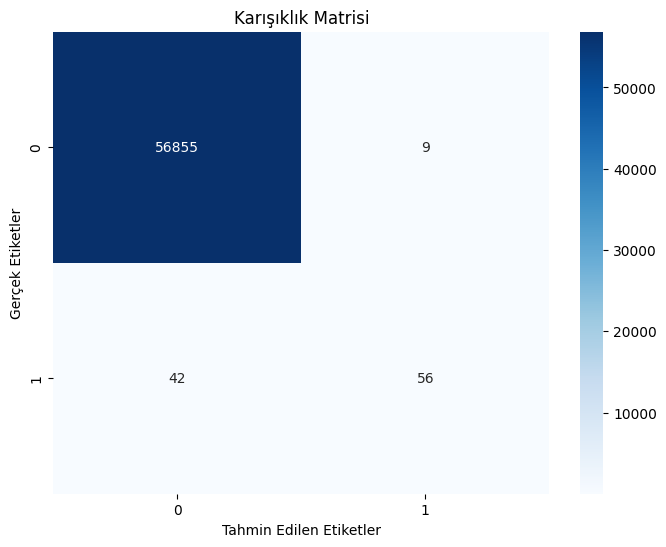

Karar sınırları sadece 2 boyutlu veriler için görselleştirilebilir.


In [53]:
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

# Modeli oluştur ve eğit
svm_model = LinearSVC(max_iter=10000)
svm_model.fit(X_train, y_train)

# Tahmin yap
y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Doğruluğu: {accuracy:.4f}")

print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred))

# Karışıklık matrisi
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Tahmin Edilen Etiketler')
plt.ylabel('Gerçek Etiketler')
plt.title('Karışıklık Matrisi')
plt.show()

# Karar sınırlarını görselleştir (2 boyutlu veriler için)
if X_train.shape[1] == 2:  # Sadece 2 özellik varsa görselleştir
    plt.figure(figsize=(10, 8))

    # Eğitim verisini çiz
    plt.scatter(x_train_scaled[:, 0], x_train_scaled[:, 1], c=y_train, cmap='coolwarm', s=50, edgecolors='k', label='Eğitim Verisi')

    # Test verisini çiz
    plt.scatter(x_test_scaled[:, 0], x_test_scaled[:, 1], c=y_test, cmap='coolwarm', s=100, marker='x', label='Test Verisi')

    # Karar sınırlarını çiz
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Karar sınırını oluşturmak için grid oluştur
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = svm_model.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)

    # Karar sınırlarını ve marjini çiz
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.contour(xx, yy, Z, colors='k', linestyles='--', linewidths=1)

    plt.xlabel('Özellik 1')
    plt.ylabel('Özellik 2')
    plt.title('SVM Karar Sınırları')
    plt.legend()
    plt.show()
else:
    print("Karar sınırları sadece 2 boyutlu veriler için görselleştirilebilir.")

Yukarıdaki kod, bir SVM (LinearSVC) modeli oluşturur, verileri standartlaştırarak modelini eğitim verisiyle eğitir ve test verisi üzerinde tahminler yapar. Modelin doğruluğu hesaplanıp, sınıflandırma raporu ve karışıklık matrisi görselleştirilir. Eğer veri 2 boyutluysa, SVM'in karar sınırları ve marjini de görselleştirilir.


### 4.6 K-Nearest Neighbors (KNN)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

kf = KFold(n_splits=3, shuffle=True, random_state=42)

# KNN modeli (k = 2)
model = KNeighborsClassifier(n_neighbors=2)

# Pipeline (Ölçekleme + Model)
pipeline = make_pipeline(StandardScaler(), model)

# Cross-validation ile doğruluk hesapla
accuracies = cross_val_score(pipeline, X_train, y_train, cv=kf, n_jobs=-1)

# Sonuçları yazdır
for i, accuracy in enumerate(accuracies, 1):
    print(f"Fold {i} Accuracy: {accuracy:.4f}")

print(f"Average Accuracy: {np.mean(accuracies):.4f}")

# Test seti için model eğitme ve tahmin yapma
pipeline.fit(X_train, y_train)



Kodumuz, K-Nearest Neighbors (KNN) sınıflandırma modeli ile çapraz doğrulama yaparak modelin doğruluğunu değerlendirir. İlk olarak, veriler 3 katmanlı KFold ile böldürülüp her bir katmanda doğruluk hesaplanır. KNN modeli, veri ölçekleme adımını içeren bir pipeline aracılığıyla eğitilir ve doğruluk sonuçları yazdırılır. Daha sonra, model eğitim verisiyle eğitilir ve test seti üzerinde tahmin yapılır. Test verisi, varsa "label" sütunu çıkarılarak işlenir ve tahmin sonuçları "id" sütunu ile birlikte bir CSV dosyasına kaydedilir.

### 4.7 Principal Component Analysis (PCA)

Explained variance ratio (Her bir bileşenin açıkladığı varyans oranı): [0.08352949 0.06314392]
Toplam açıklanan varyans: 0.14667341283864344


<ipython-input-55-4b16cc891e82>:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5, cmap='viridis')


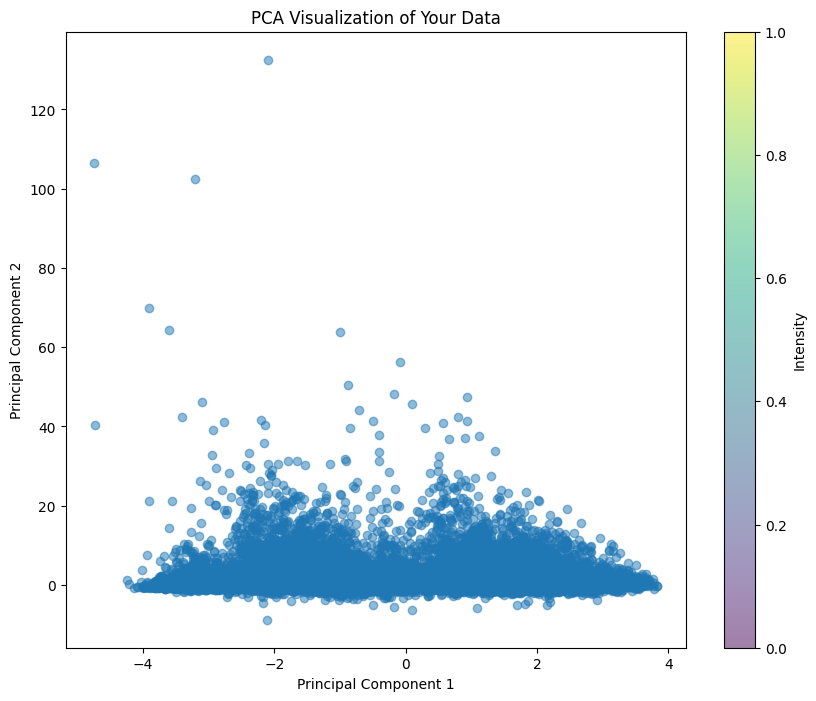

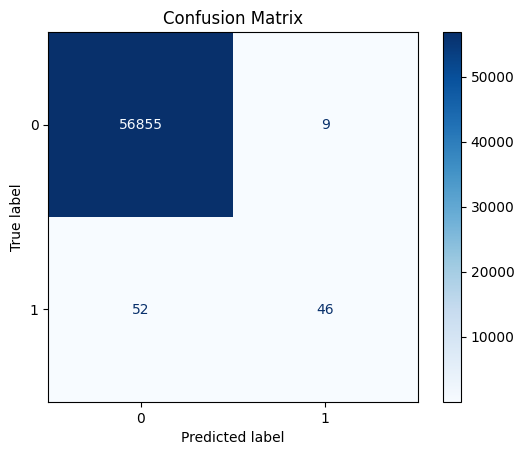

In [55]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Veriyi ölçeklendir
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns=['Class']))

# PCA'yı 2 boyutlu yap
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Açıklanan varyans oranını yazdır
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio (Her bir bileşenin açıkladığı varyans oranı):", explained_variance)
print("Toplam açıklanan varyans:", np.sum(explained_variance))

# PCA sonuçlarını görselleştir
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5, cmap='viridis')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization of Your Data")
plt.colorbar(scatter, label='Intensity')
plt.show()

# Lojistik Regresyon modelini oluştur ve eğit
model = LogisticRegression()
model.fit(X_train, y_train)

# Test seti üzerinde tahmin yap
y_pred = model.predict(X_test)

# Karışıklık matrisini hesapla
cm = confusion_matrix(y_test, y_pred)

# Karışıklık matrisini görselleştir
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


### 4.8 K-means Clustering

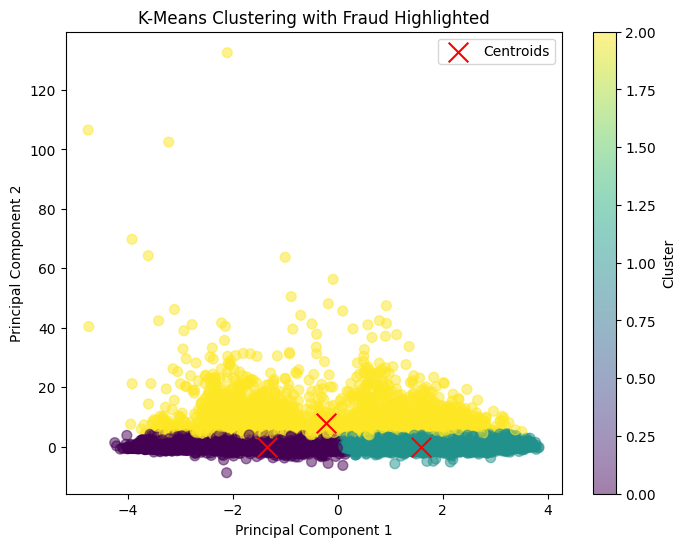

In [57]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)

labels = kmeans.labels_

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50, alpha=0.5)
plt.colorbar(scatter, label="Cluster")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering with Fraud Highlighted")
plt.legend()
plt.show()

### 4.9 XGBoost

In [56]:
import xgboost as xgb

X_train_new = X_train.drop(columns=['Time', 'Amount'])
X_test_new = X_test.drop(columns=['Time', 'Amount'])

# Train XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train_new, y_train)

# Predict on test data
y_pred = xgb_model.predict(X_test_new)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Model Doğruluğu: {accuracy:.4f}")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:35:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model Doğruluğu: 0.9996


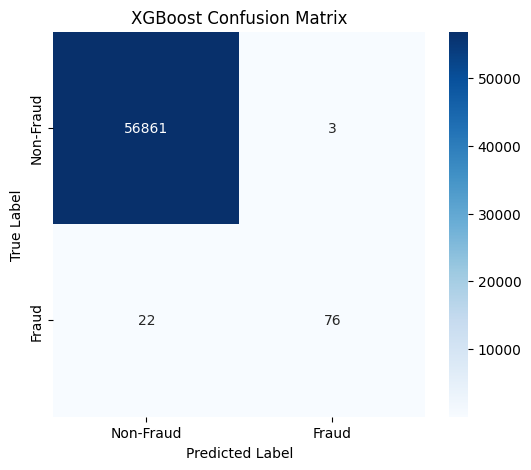

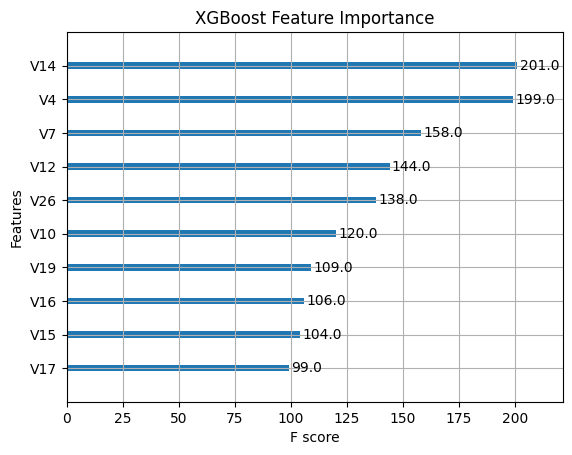

In [58]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("XGBoost Confusion Matrix")
plt.show()

# Feature importance plot
xgb.plot_importance(xgb_model, max_num_features=10, importance_type="weight")
plt.title("XGBoost Feature Importance")
plt.show()

### 4.10 Hierarchical Clustering

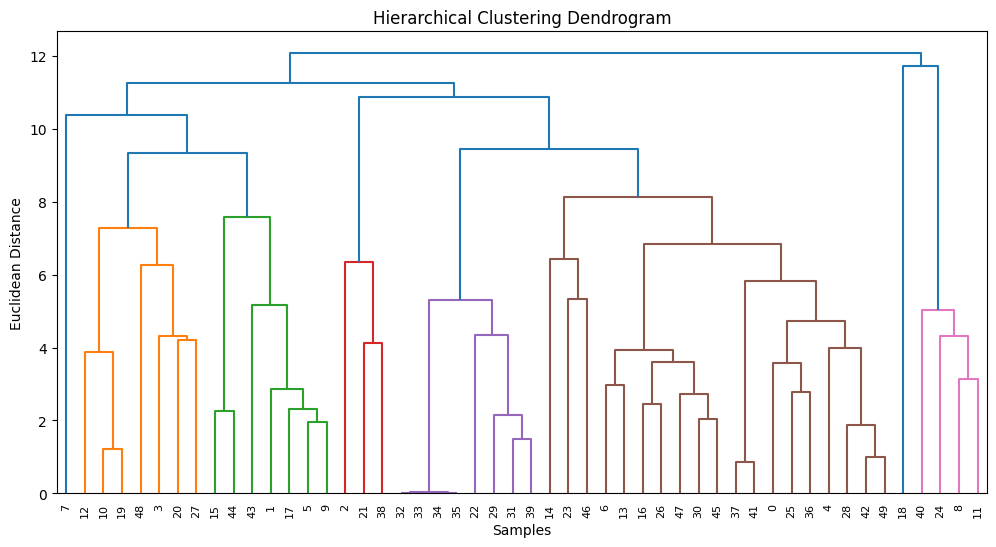

In [59]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(sch.linkage(X_scaled[:50], method='ward')) #veri setinin ilk 50 özelliğini alındı.
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Euclidean Distance")
plt.show()

### Conclusion
 ML algoritmalarını test ettiğimizde Random Forest en yüksek sonuç vermiştir.